<a href="https://colab.research.google.com/github/AlvinMaul/uts-pengolahan-citra_Muhammad-Alvin-Maulana_237006516072/blob/main/Latihan_2_Muhammad_Alvin_Maulana_237006516072.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from google.colab import files


Saving Moon.jpg to Moon.jpg


(np.float64(-0.5), np.float64(2579.5), np.float64(2451.5), np.float64(-0.5))

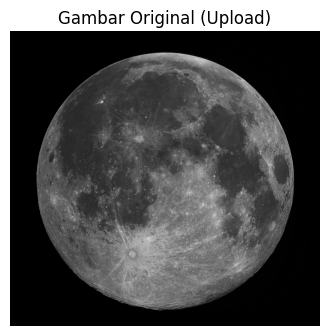

In [ ]:
uploaded = files.upload()

# ambil nama file pertama yang di-upload
filename = list(uploaded.keys())[0]

# baca gambar dalam mode grayscale
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE).astype(np.float32)

plt.figure(figsize=(4,4))
plt.imshow(img, cmap='gray')
plt.title("Gambar Original (Upload)")
plt.axis('off')


(np.float64(-0.5), np.float64(2579.5), np.float64(2451.5), np.float64(-0.5))

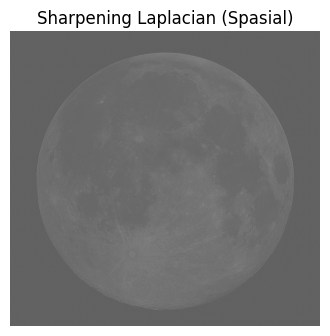

In [ ]:
lap = cv2.Laplacian(img, cv2.CV_32F, ksize=3)
lap_sharp = img - lap

plt.figure(figsize=(4,4))
plt.imshow(lap_sharp, cmap='gray')
plt.title("Sharpening Laplacian (Spasial)")
plt.axis('off')


(np.float64(-0.5), np.float64(2579.5), np.float64(2451.5), np.float64(-0.5))

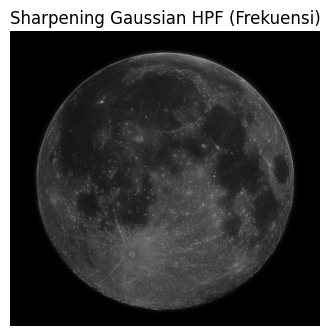

In [ ]:
def gaussian_hpf(shape, cutoff):
    h, w = shape
    u, v = np.meshgrid(np.arange(w), np.arange(h))
    du = u - w/2
    dv = v - h/2
    D = np.sqrt(du**2 + dv**2)
    H = 1 - np.exp(-(D**2) / (2*(cutoff**2)))
    return H

def apply_hpf(image, cutoff):
    F = np.fft.fft2(image)
    Fshift = np.fft.fftshift(F)

    H = gaussian_hpf(image.shape, cutoff)
    G = Fshift * H

    ishift = np.fft.ifftshift(G)
    filtered = np.abs(np.fft.ifft2(ishift))

    return filtered

hpf_result = apply_hpf(img, cutoff=20)
freq_sharp = img + hpf_result

plt.figure(figsize=(4,4))
plt.imshow(freq_sharp, cmap='gray')
plt.title("Sharpening Gaussian HPF (Frekuensi)")
plt.axis('off')




=== METRIK KUALITAS ===
Laplacian Sharpening  → PSNR: 14.4165, SSIM: 0.6210
HPF Gaussian Sharpen  → PSNR: 24.3919, SSIM: 0.8748


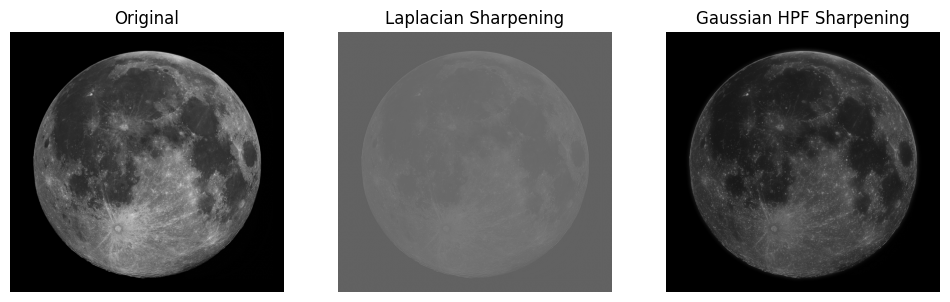

In [ ]:
def evaluate(ref, result):
    psnr = peak_signal_noise_ratio(ref, result, data_range=255)
    ssim = structural_similarity(ref, result, data_range=255)
    return psnr, ssim

lap_psnr, lap_ssim = evaluate(img, lap_sharp)
hpf_psnr, hpf_ssim = evaluate(img, freq_sharp)

print("\n=== METRIK KUALITAS ===")
print(f"Laplacian Sharpening  → PSNR: {lap_psnr:.4f}, SSIM: {lap_ssim:.4f}")
print(f"HPF Gaussian Sharpen  → PSNR: {hpf_psnr:.4f}, SSIM: {hpf_ssim:.4f}")

plt.figure(figsize=(12,4))

plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(lap_sharp, cmap='gray'); plt.title("Laplacian Sharpening"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(freq_sharp, cmap='gray'); plt.title("Gaussian HPF Sharpening"); plt.axis('off')

plt.show()


In [ ]:
import pandas as pd

df = pd.DataFrame({
    "Metode": ["Laplacian Sharpening", "Gaussian HPF Sharpening"],
    "PSNR": [lap_psnr, hpf_psnr],
    "SSIM": [lap_ssim, hpf_ssim]
})

df


,Metode,PSNR,SSIM
0,Laplacian Sharpening,14.416510,0.620991
1,Gaussian HPF Sharpening,24.391945,0.874758


In [ ]:
print("""
=== ANALISIS HASIL LATIHAN 2 ===

1. Laplacian Sharpening (domain spasial)
   • Menajamkan tepi secara agresif.
   • Menambah noise karena Laplacian sensitif terhadap perubahan intensitas.
   • Cocok untuk citra yang terlalu blur atau low-contrast.

2. Gaussian HPF (domain frekuensi)
   • Menangkap detail frekuensi tinggi (edge halus).
   • Penajaman lebih halus dan bersih.
   • Noise tidak meningkat sebanyak Laplacian.

3. Perbandingan
   • Laplacian → tajam tapi lebih berisik.
   • HPF Gaussian → tajam, lebih natural, lebih sedikit noise.
""")



=== ANALISIS HASIL LATIHAN 2 ===

1. Laplacian Sharpening (domain spasial)
   • Menajamkan tepi secara agresif.
   • Menambah noise karena Laplacian sensitif terhadap perubahan intensitas.
   • Cocok untuk citra yang terlalu blur atau low-contrast.

2. Gaussian HPF (domain frekuensi)
   • Menangkap detail frekuensi tinggi (edge halus).
   • Penajaman lebih halus dan bersih.
   • Noise tidak meningkat sebanyak Laplacian.

3. Perbandingan
   • Laplacian → tajam tapi lebih berisik.
   • HPF Gaussian → tajam, lebih natural, lebih sedikit noise.

